In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings

In [3]:
df = pd.read_feather('data/dataset.feather')

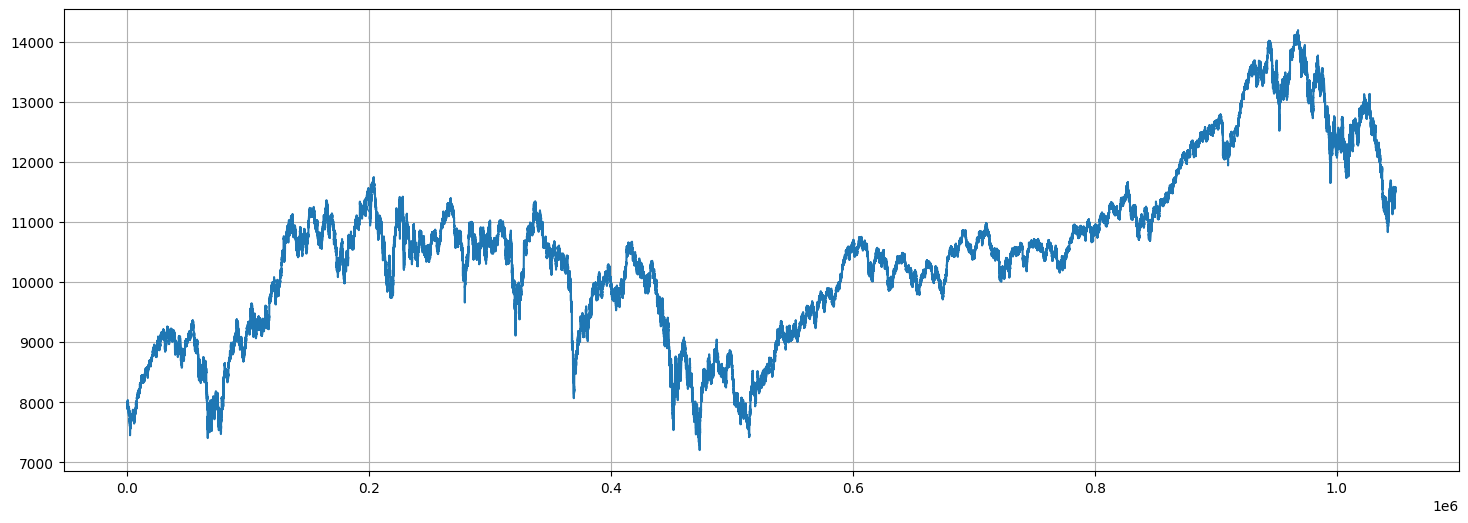

In [3]:
plt.figure(figsize=(18, 6))
plt.plot( df['VALUE'].tolist())
plt.grid(True)

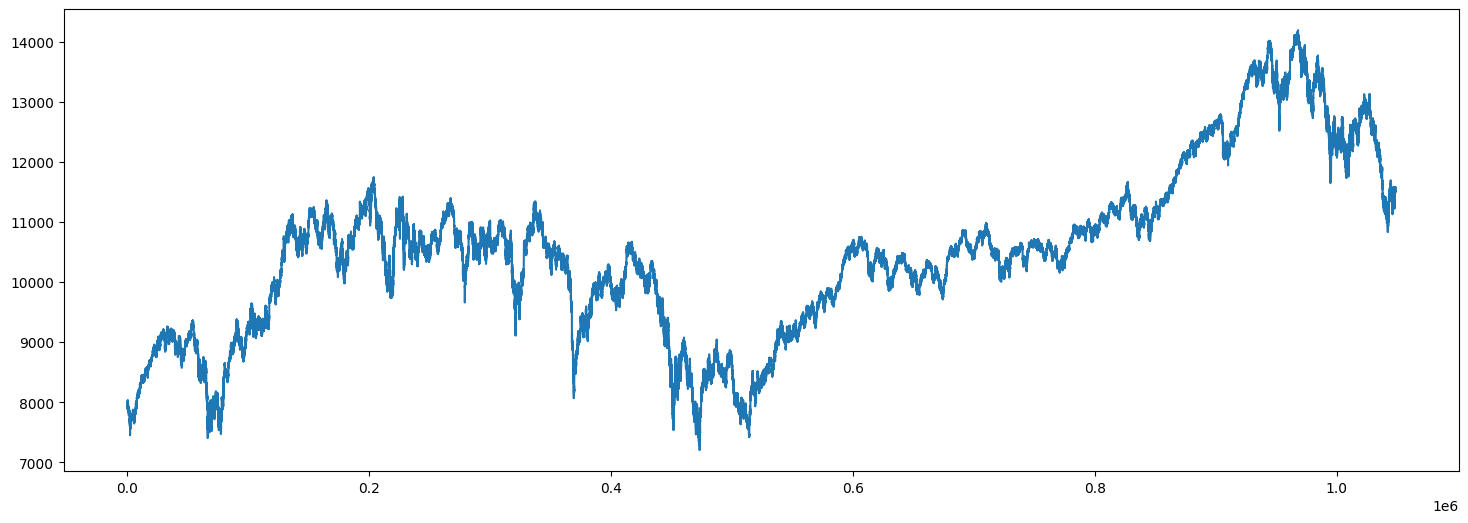

In [4]:
plt.figure(figsize=(18, 6))
plt.plot( df['VALUE'].dropna().tolist())

In [5]:
warnings.filterwarnings("ignore")

# Assuming you have already loaded your dataset as 'data_series'
# Perform ADF test to determine d
adf_test = adfuller(df['VALUE'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# if p-value is greater than 0.05 we consider it non-stationary and start differencing
d = 0 if adf_test[1] <= 0.05 else 1


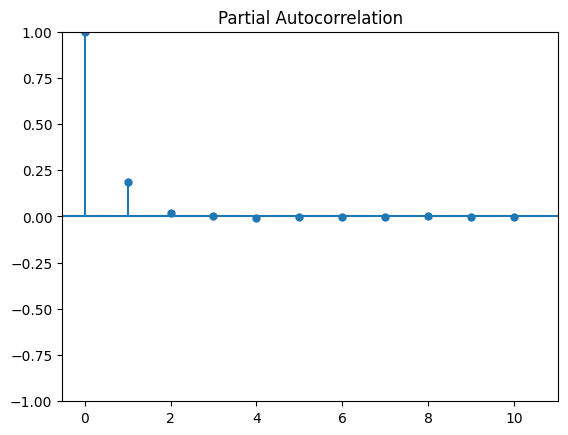

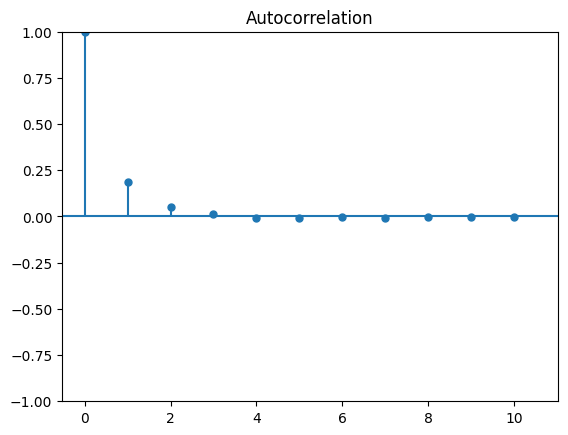

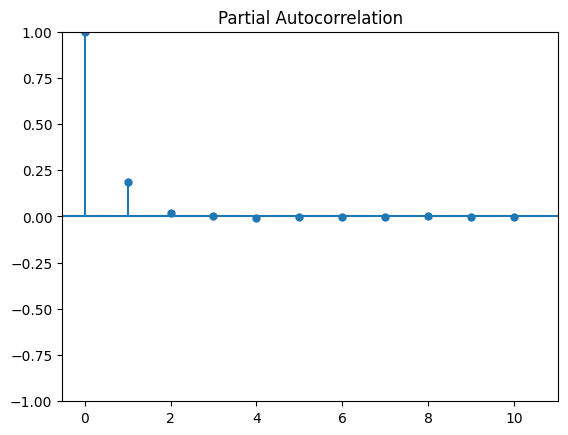

In [4]:

# Plot ACF and PACF to identify potential p and q
plot_acf(df['VALUE'].diff().dropna(), lags=10)  # Change lags as needed
plot_pacf(df['VALUE'].diff().dropna(), lags=10) # Change lags as needed

# identification of p and q here based on plots...


In [6]:
d = 1

# Model Selection based on AIC
p = q = range(0, 3) # example range, adjust based on plot observation
pdq = list(itertools.product(p, [d], q))

lowest_aic, best_pdq = float("inf"), None
for param in pdq:
    try:
        model = ARIMA(df['VALUE'], order=param)
        results = model.fit()
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best model: ARIMA{best_pdq} - AIC:{lowest_aic}")


Best model: ARIMA(2, 1, 2) - AIC:6051588.054383757


In [7]:
model = ARIMA(df['VALUE'], order=best_pdq)
model_fit = model.fit()
# forecast = model_fit.forecast(steps=30)

In [8]:
# Print summary of the model
print(model_fit.summary())

# Save the trained ARIMA model to a file using pickle
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:              1048575
Model:                 ARIMA(2, 1, 2)   Log Likelihood            -3025789.027
Date:                Fri, 22 Dec 2023   AIC                        6051588.054
Time:                        05:09:59   BIC                        6051647.369
Sample:                             0   HQIC                       6051604.347
                            - 1048575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3992      0.219      1.825      0.068      -0.029       0.828
ar.L2         -0.0461      0.061     -0.759      0.448      -0.165       0.073
ma.L1         -0.2140      0.219     -0.979      0.3

In [25]:
forecast

1048575    11575.222010
1048576    11575.813925
1048577    11576.603492
1048578    11577.395067
1048579    11577.883565
1048580    11578.485895
1048581    11579.442353
1048582    11579.939212
1048583    11580.461703
1048584    11581.386636
1048585    11582.015772
1048586    11582.527546
1048587    11583.277363
1048588    11584.087324
1048589    11584.621596
1048590    11585.229924
1048591    11586.085804
1048592    11586.732005
1048593    11587.263469
1048594    11588.051524
1048595    11588.791389
1048596    11589.400638
1048597    11590.000781
1048598    11590.822404
1048599    11591.551118
1048600    11592.017110
1048601    11592.828038
1048602    11593.648424
1048603    11594.143584
1048604    11594.813873
Name: predicted_mean, dtype: float64